In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd


In [ ]:
def train_val_datasets():
    training_dataset = tf.keras.utils.image_dataset_from_directory(
        directory='/content/horse-or-human.zip/',
        batch_size=32,
        image_size=(150,150),
        shuffle=True,
        seed=7
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory='/content/validation-horse-or-human.zip',
        batch_size=32,
        image_size=(150,150),
        shuffle=True,
        seed=7
    )
    return training_dataset, validation_dataset


In [ ]:
path_inception = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file ='/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(include_top = False,
                                input_shape = (150, 150, 3),
                                weights = None)

pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers:
    layers.trainable = False

pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_564 (Conv2D)       │ (None, 74, 74, 32)     │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_564   │ (None, 74, 74, 32)     │             96 │ conv2d_564[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_564            │ (None, 74, 74, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_565 (Conv2D)       │ (None, 72, 72, 32)     │          9,216 │ activation_564[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_565   │ (None, 72, 72, 32)     │             96 │ conv2d_565[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_565            │ (None, 72, 72, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_566 (Conv2D)       │ (None, 72, 72, 64)     │         18,432 │ activation_565[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_566   │ (None, 72, 72, 64)     │            192 │ conv2d_566[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_566            │ (None, 72, 72, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_24          │ (None, 35, 35, 64)     │              0 │ activation_566[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_567 (Conv2D)       │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_567   │ (None, 35, 35, 80)     │            240 │ conv2d_567[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_567            │ (None, 35, 35, 80)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_568 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
print('Name: BARATHRAJ B     Register Number: 212222230019')


Name: BARATHRAJ B     Register Number: 212222230019


In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy']>0.970:
            self.model.stop_training = True
            print("\nReached 97.0% accuracy so cancelling training!")


In [ ]:

def output_of_last_layer(pre_trained_model):
    last_desired_layer = pre_trained_model.get_layer('mixed7')
    last_output = last_desired_layer.output

    print('last layer output shape: ', last_output.shape)
    return last_output

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from tensorflow.keras.optimizers import RMSprop


In [ ]:
def create_final_model(pre_trained_model, last_output):
    x = tf.keras.layers.Flatten()(last_output)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=pre_trained_model.input, outputs=x)
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
        loss='binary_crossentropy', # use a loss for binary classification
        metrics=['accuracy']
    )
    return model

In [ ]:
model = create_final_model(pre_trained_model, last_output)
path_horse_or_human = '/content/horse-or-human.zip'
path_validation_horse_or_human = '/content/validation-horse-or-human.zip'
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

In [ ]:
local_zip = path_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()


In [ ]:
local_zip = path_validation_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_564 (Conv2D)       │ (None, 74, 74, 32)     │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_564   │ (None, 74, 74, 32)     │             96 │ conv2d_564[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_564            │ (None, 74, 74, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_565 (Conv2D)       │ (None, 72, 72, 32)     │          9,216 │ activation_564[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_565   │ (None, 72, 72, 32)     │             96 │ conv2d_565[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_565            │ (None, 72, 72, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_566 (Conv2D)       │ (None, 72, 72, 64)     │         18,432 │ activation_565[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_566   │ (None, 72, 72, 64)     │            192 │ conv2d_566[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_566            │ (None, 72, 72, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_24          │ (None, 35, 35, 64)     │              0 │ activation_566[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_567 (Conv2D)       │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_567   │ (None, 35, 35, 80)     │            240 │ conv2d_567[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_567            │ (None, 35, 35, 80)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_568 (Conv2D)  

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 47,493,665 (181.17 MB)

 Non-trainable params: 18,816 (73.50 KB)

In [ ]:
print("Name: BARATHRAJ B  Reg No: 212222230019")

Name: BARATHRAJ B  Reg No: 212222230019


In [ ]:
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

train_horses_dir = os.path.join(train_dir, 'horses')
train_humans_dir = os.path.join(train_dir, 'humans')
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_humans_fnames))

500
527
128
128


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  height_shift_range = 0.2,
                                  width_shift_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  rotation_range = 0.4,
                                  shear_range = 0.1,
                                  zoom_range = 0.3,
                                  fill_mode = 'nearest'
                                  )
test_datagen = ImageDataGenerator(rescale = 1/255)


In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary',
                                                   shuffle = True)

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size =20,
                                                        class_mode = 'binary',
                                                        shuffle = False)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
callbacks = EarlyStoppingCallback()
history = model.fit(train_generator,
    validation_data = validation_generator,
    epochs = 100,
    verbose = 2,
    callbacks = [EarlyStoppingCallback()],
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 - 264s - 5s/step - accuracy: 0.8189 - loss: 0.4862 - val_accuracy: 0.9336 - val_loss: 0.1637
Epoch 2/100
52/52 - 228s - 4s/step - accuracy: 0.9649 - loss: 0.1975 - val_accuracy: 0.9141 - val_loss: 0.1844
Epoch 3/100

Reached 97.0% accuracy so cancelling training!
52/52 - 232s - 4s/step - accuracy: 0.9815 - loss: 0.1005 - val_accuracy: 0.8203 - val_loss: 0.4478


In [ ]:

def output_of_last_layer(pre_trained_model):
    last_desired_layer = pre_trained_model.get_layer('mixed7')
    last_output = last_desired_layer.output

    print('last layer output shape: ', last_output.shape)

    return last_output

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def create_final_model(pre_trained_model, last_output):
    x = tf.keras.layers.Flatten()(last_output)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=pre_trained_model.input, outputs=x)
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
model = create_final_model(pre_trained_model, last_output)

In [ ]:
path_horse_or_human = '/content/horse-or-human.zip'
path_validation_horse_or_human = '/content/validation-horse-or-human.zip'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

In [ ]:
local_zip = path_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()

local_zip = path_validation_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_564 (Conv2D)       │ (None, 74, 74, 32)     │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_564   │ (None, 74, 74, 32)     │             96 │ conv2d_564[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_564            │ (None, 74, 74, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_565 (Conv2D)       │ (None, 72, 72, 32)     │          9,216 │ activation_564[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_565   │ (None, 72, 72, 32)     │             96 │ conv2d_565[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_565            │ (None, 72, 72, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_566 (Conv2D)       │ (None, 72, 72, 64)     │         18,432 │ activation_565[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_566   │ (None, 72, 72, 64)     │            192 │ conv2d_566[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_566            │ (None, 72, 72, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_24          │ (None, 35, 35, 64)     │              0 │ activation_566[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_567 (Conv2D)       │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_567   │ (None, 35, 35, 80)     │            240 │ conv2d_567[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_567            │ (None, 35, 35, 80)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_568 (Conv2D)  

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 47,493,665 (181.17 MB)

 Non-trainable params: 18,816 (73.50 KB)

In [ ]:
print("Name: BARATHRAJ B  Reg No: 212222230019")

Name: BARATHRAJ B  Reg No: 212222230019


In [ ]:
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

train_horses_dir = os.path.join(train_dir, 'horses')
train_humans_dir = os.path.join(train_dir, 'humans')
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_humans_fnames))

500
527
128
128


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  height_shift_range = 0.2,
                                  width_shift_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  rotation_range = 0.4,
                                  shear_range = 0.1,
                                  zoom_range = 0.3,
                                  fill_mode = 'nearest'
                                  )
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary',
                                                   shuffle = True)

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size =20,
                                                        class_mode = 'binary',
                                                        shuffle = False)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
callbacks = EarlyStoppingCallback()
history = model.fit(train_generator,
    validation_data = validation_generator,
    epochs = 100,
    verbose = 2,
    callbacks = [EarlyStoppingCallback()],
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 - 257s - 5s/step - accuracy: 0.9260 - loss: 0.2818 - val_accuracy: 0.8203 - val_loss: 0.3402
Epoch 2/100

Reached 97.0% accuracy so cancelling training!
52/52 - 260s - 5s/step - accuracy: 0.9883 - loss: 0.0807 - val_accuracy: 0.6602 - val_loss: 1.0356


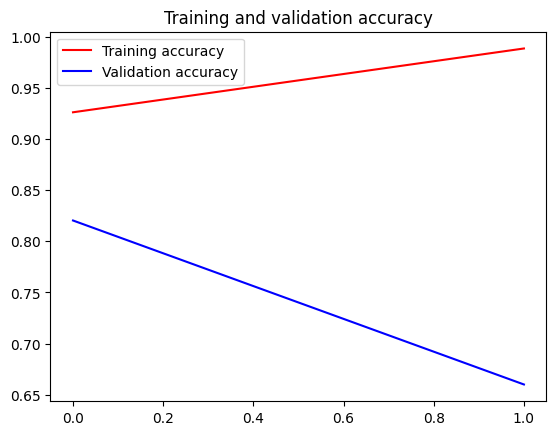

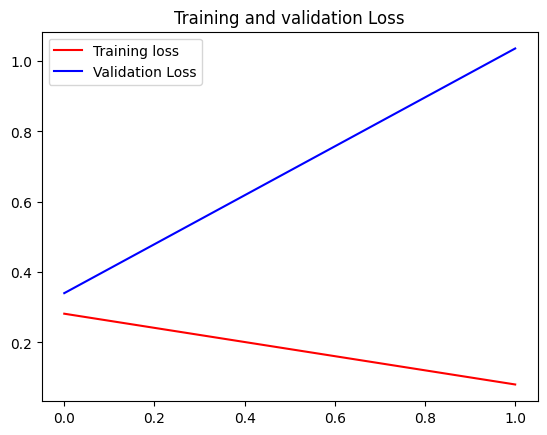

<Figure size 640x480 with 0 Axes>

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Name: BARATHRAJ B      Register Number: 212222230019    ')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Name: BARATHRAJ B      Register Number: 212222230019    ')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()